<a href="https://colab.research.google.com/github/aggelospsiris/Semantic-Text-Representation-Using-GNNs-for-Information-Retrieval/blob/main/attri2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required packages.
# install StellarGraph if running on Google Colab
import sys
if 'google.colab' in sys.modules:
  %pip install -q stellargraph[demos]==1.2.1
!pip install dgl
from google.colab import drive
drive.mount('/drive')
import csv
import os
import torch
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import re
import itertools
from torch.nn import Linear
import torch.nn as nn
import dgl.function as fn
import torch.nn.functional as F
import dgl
os.environ['TORCH'] = torch.__version__
print(torch.__version__)
# Helper function for visualization.
%matplotlib inline
import json
from numpy.linalg import norm
import networkx as nx
import pandas as pd
import numpy as np
import os
import random

import networkx as nx
import pandas as pd
import numpy as np
import os
import random

import stellargraph as sg
from stellargraph.data import UnsupervisedSampler
from stellargraph.mapper import Attri2VecLinkGenerator, Attri2VecNodeGenerator
from stellargraph.layer import Attri2Vec, link_classification

from tensorflow import keras

from pandas.core.indexes.base import Index

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

from stellargraph import datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.2/435.2 KB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.3/500.3 KB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 21.6 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


Mounted at /drive


DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
1.13.1+cu116


In [ ]:
Qtest =  [' What are the effects of calcium on the physical properties of mucus from CF patients',
              ' Can one distinguish between the effects of mucus hypersecretion and infection on the submucosal glands of the respiratory tract in CF',
              ' How are salivary glycoproteins from CF patients different from those of normal subjects',
              ' What is the lipid composition of CF respiratory secretions',
              ' Is CF mucus abnormal',
              ' What is the effect of water or other therapeutic agents on the physical properties viscosity elasticity of sputum or bronchial secretions from CF patients',
              ' Are mucus glycoproteins degraded differently in CF patients as compared to those from normal subjects',
              ' What histochemical differences have been described between normal and CF respiratory epithelia',
              ' What is the association between liver disease cirrhosis and vitamin A metabolism in CF',
              ' What is the role of Vitamin E in the therapy of patients with CF ',
              ' What is the difference between meconium ileus and meconium plug syndrome',
              ' What abnormalities of amino acid transport have been described in the small bowel of CF patients',
              ' What are the clinical or biochemical features of pancreatitis in CF patients',
              ' What non-invasive tests can be performed for the evaluation of exocrine pancreatic function in patients with CF',
              ' What are the hepatic complications or manifestations of CF', ' What are the gastrointestinal complications of CF after the neonatal period exclude liver disease and meconium ileus', ' What is the most effective regimen for the use of pancreatic enzyme supplements in the treatment of CF patients', ' Is dietary supplementation with bile salts of therapeutic benefit to CF patients', ' What complications of pancreatic enzyme therapy have been reported in CF patients', ' What is the effect of treatment of CF patients with essential fatty acid supplements', ' Does pancreatic insufficiency in CF patients affect their ability to absorb or metabolize iron', ' What is the frequency of CF in non-Caucasian populations', ' What congenital or hereditary diseases or conditions have been found in association with CF', ' What are the characteristics of patients in whom CF is incompletely manifested', ' What evidence is there that the genetic basis for CF involves more than one gene', ' What is the heterozygote advantage in CF ', ' What is the concordance of clinical or biochemical manifestations of CF in sibling pairs both of whom have CF', ' What is the incidence of male fertility in CF', ' What is the pathology of the reproductive system male or female in cf', ' What are the results of genetic counseling of families of children with cf', ' What are the major psychological or social effects of CF on patients and their families', ' What factors influence compliance with prescribed therapy in CF', ' What conditions or factors lead to erroneous sweat tests', ' What alternative techniques other than the classical Gibson-Cooke quantitative pilocarpine iontophoresis test are available for sweat testing what are their relative advantages and disadvantages', ' Has any CF patient been found to have consistently normal sweat tests', ' What is the concentration of potassium in sweat from CF patients', ' What techniques are available for screening of newborn infants for CF and what factors contribute to erroneous results of these tests', ' Can CF be diagnosed prenatally', ' How may heterozygotes for CF be identified', ' Other than the sweat test what techniques may be useful beyond the neonatal period for the diagnosis of CF', ' Is Vitamin D metabolism normal in CF patients', ' What abnormalities of insulin secretion or insulin metabolism occur in CF patients', ' Is salt sodium andor chloride transportpermeability abnormal in CF patients', ' What structural or enzymatic differences are there between fibroblasts from CF patients and non-CF patients', ' What abnormalities of prostaglandin metabolism have been described in CF patients', ' What are the properties and activity of galactosyltransferase enzymes from cf patients', ' What differences between normal subjects and CF patients have been described in the function or metabolism of hormones', ' Do fibroblasts from CF patients grow at a normal rate', ' Is RNA methylation or polyamine metabolism normal in CF patients', ' What defects in the synthesis or metabolism of cyclic nucleotides have been described in CF patients', ' What circulating or secreted factors have been described in CF', ' What is known about prolactin in CF patients', ' Does secretory IgA protect CF patients against bacterial colonization or infection', ' What is the relationship of allergy or hypersensitivity to lung disease in CF patients', ' What are the interactions between proteases endogenous or bacterial origin and antiproteases in the lungs of CF patients', ' What is the relationship between nutrition and pulmonary host defenses against bacterial infection in CF patients', ' What is the pathophysiologic role of circulating antibodies to Pseudomonas aeruginosa in CF patients', ' What is the immunologic response to pulmonary infection in CF patients', ' What immunologic abnormalities have been found in CF patients', ' What are the effects of CF on the pulmonary circulation', ' Is there a defect in mucociliary transport clearance in the respiratory tract of CF patients', ' What are the clinical features of lung disease in CF patients', ' What are the biochemical or microscopic characteristics of airway inflammation in CF patients', ' How does lung function change with time in CF patients time periods', ' What are the abnormalities of pulmonary function in CF patients', ' What are the pathologic features of lung disease in CF patients', ' What is the prognosis for patients who have had an episode of respiratory failure', ' What are the effects of bronchodilators in CF patients', ' What is the best way to treat pneumothorax in CF patients', ' What is the treatment for and prognosis of hemoptysis in CF patients', ' What is the prognosis for infants with wheezing and cystic fibrosis', ' What is the best treatment for nasal polyps in CF patients', ' How effective is bronchial lavage in CF patients', ' What are the results of mechanical ventilation in CF patients with respiratory failure', ' What is the best treatment for pulmonary hypertension and or cor pulmonale in CF patients', ' What are the effects of exercise training programs on lung function in CF patients', ' What techniques are effective in promoting clearance of mucus from the lungs of CF patients', ' What special considerations are there for treatment of CF patients with antibiotics ie are the pharmacodynamics of antibiotics different in CF patients or are there other special problems peculiar to CF ', ' What is the role of orally administered antibiotics in the treatment of CF patients', ' What is the evidence that combination therapy with aminoglycosides and semisynthetic penicillins is more effective than therapy with either alone', ' How effective are inhalations of mucolytic agents in the treatment of CF patients', ' What is the role of aerosols in the treatment of lung disease in CF patients', ' What is the role of bacterial phagocytosis by alveolar macrophages or polymorphonuclear leukocytes in lung disease in CF patients', ' What is the relationship between Haemophilus influenzae and Pseudomonas aeruginosa in CF patients', ' Do CF patients ever develop infection in organs other than the lung If so in what organs', ' What is the role of bacteria other than Pseudomonas aeruginosa Staphylococcus aureus or Haemophilus influenzae in the pathogenesis of lung disease in CF patients of lung disease in CF patients', ' What is the role of fungi in the pathogenesis of lung disease in CF patients', ' What is the role of viral infection in the lung disease of CF patients', ' What is the epidemiology of Pseudomonas aeruginosa in CF patients', ' What factors are responsible for the appearance of mucoid strains of Pseudomonas aeruginosa in CF patients', ' What are the unusual manifestations of CF other than lung disease or exocrine pancreatic insufficiency', ' What is the prognosis for survival of patients with CF', ' Do CF patients have normal intelligence', ' What animal models are available which are relevant to CF', ' What abnormalities of skeletal muscle function or structure have been found in CF patients', ' Is there an increased incidence of dental problems eg caries or periodontal disease in CF patients', ' Is oxygen transport by red blood cells abnormal in CF patients', ' What are the effects of CF on the development and or function of the brain and central nervous system', ' Are there abnormalities of taste in CF patients', ' What is the incidence of and treatment for hypertrophic osteoarthropathy in CF patients']

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
f = open('/content/sample_data/invertedindex.dat.txt', 'r')
Lines = f.readlines()
Lines_without_stopwords = []
i = 0
for line in Lines:
    new_line = line.replace(",",";")
    new_line = new_line.split(';')
    if new_line[1].lower() not in stop_words:
      new_line[0] = str(i)
      Lines_without_stopwords.append(new_line)
      i = i + 1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def create_querie_graph(Lines,queries):

  G = nx.Graph()

  #queries preprocessing
  queries_list = []
  for q in queries:
    capitalized = q.upper()
    x = capitalized.split()
    queries_list.append(x)
  #create vocubluary
  #a 2d list with each row containing the word and the word weight
  list_vocab = []
  for new_line in Lines:
    list_vocab.append([new_line[1],float(new_line[2]),new_line[0],'red'])
  #create embeddings for the queries
  vect = []
  count = 0
  i = 1500
  futures_dict = {}
  #for every querie
  for q in queries_list:
      #for every word in the texts vocublary
      for v in list_vocab:
            #for every word in the querie
            for word in q:
                if(v[0] == word):
                   count = count +1
            #count the number of occurancies of the words that exists in the querie and in the vocablary
            vect.append(count*v[1])
            #add a new edge to the graph between the word and the querie with weight = occurancies*weight_of_the word
            if  count > 0:
                G.add_node(v[0],weight=v[1],vocub_position=v[2],color=v[3],type=0)
                G.add_node(i,color = 'green',type=2)
                G.add_edge(v[0], i, weight=count)
            count = 0

      arr = np.array(vect)
      norm_l2 = norm(arr)
      futures_dict[i] = vect/norm_l2
      i = i + 1
      vect = []
  nx.set_node_attributes(G, futures_dict, name="futures")

  return G

G_queries = create_querie_graph(Lines_without_stopwords,Qtest)

In [ ]:
import ast
futures_dict = {}
df_dict=pd.read_csv('/drive/My Drive/diplomatiki/texts_dict6.csv', header=None)
for index, row in df_dict.iterrows():
    arr = np.array(ast.literal_eval(row[1]))
    norm_l2 = norm(arr)
    futures_dict[(row[0])] = ast.literal_eval(row[1])/norm_l2

In [ ]:
def create_graph_from_invertedindex(Lines,futures_dict):


  G = nx.Graph()
  lines = []
  word = []

  for new_line in Lines:
    i = 0
    for i in range(len(new_line)):
      if re.search("^txtfiles",new_line[i]):
          word_id = new_line[1]
          weight = float(new_line[2])
          vocub_position = int(new_line[0])
          #convert text ids into ints cause later i am gonna use them into tensors
          text_id = int(new_line[i][9:])
          occurancies = int(new_line[i+1])
          G.add_node(word_id,weight=weight,vocub_position=vocub_position,color='red',type=0)
          G.add_node(text_id,color='blue',type=1)
          G.add_edge(word_id, text_id, weight=occurancies)

  nx.set_node_attributes(G,futures_dict, name="futures")


  return G

G_texts = create_graph_from_invertedindex(Lines_without_stopwords,futures_dict)

In [ ]:
def add_edges_between_texts(G,a):


  #connect the 2 graphs.Experiment of running gnns to the connect graph of
  #G = nx.compose(G_texts, G_queries)
  types = nx.get_node_attributes(G, "type")
  #It creates edges type of (text,text),(querie,text) and drops the (text,node) edges
  #for every word node
  for node in [n for n,v in G.nodes(data=True) if v['type'] == 0]:
    #take all the edges of this word node
    edges = G.edges(node)
    edges = list(edges.__iter__())
    new_nodes_ids = []
    #for every edge
    for edge in edges:
      #take only text nodes of this edge
      new_nodes_ids.append(edge[1])
    #for every pair of the texts nodes make a new edge with weight = avg of the
    for pair in itertools.product(new_nodes_ids, repeat=2):
      weight = np.mean([G[node][pair[0]]["weight"],G[node][pair[1]]["weight"]])
      #not connect qurie nodes together #for fighting the mean weight #weights.append(weight)
      if  weight>a:
        if G.has_edge(*pair):
            G[pair[0]][pair[1]]["weight"] = G[pair[0]][pair[1]]["weight"] + weight
        else :
            G.add_edge(pair[0],pair[1],weight=weight)
    #remove the word node and all its edges
    G.remove_node(node)
  return G
#the parameter to create an edge between 2 texts
a =  12
g1 = add_edges_between_texts(G_texts,a)

In [ ]:
from stellargraph import StellarGraph

G = StellarGraph.from_networkx(g1,node_features='futures')

In [ ]:
unsupervised_samples = UnsupervisedSampler(
    G, nodes=list(G.nodes()), length=3, number_of_walks=100
)

In [ ]:
batch_size = 50
epochs = 5

In [ ]:
generator = Attri2VecLinkGenerator(G, batch_size)
train_gen = generator.flow(unsupervised_samples)

In [ ]:
layer_sizes = [128]
attri2vec = Attri2Vec(
    layer_sizes=layer_sizes, generator=generator, bias=False, normalize=None
)

In [ ]:
# Build the model and expose input and output sockets of attri2vec, for node pair inputs:
x_inp, x_out = attri2vec.in_out_tensors()

In [ ]:
prediction = link_classification(
    output_dim=1, output_act="sigmoid", edge_embedding_method="ip"
)(x_out)

link_classification: using 'ip' method to combine node embeddings into edge embeddings


In [ ]:
model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-3),
    loss=keras.losses.binary_crossentropy,
    metrics=[keras.metrics.binary_accuracy],
)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(
    train_gen,
    epochs=epochs,
    verbose=2,
    use_multiprocessing=False,
    workers=1,
    shuffle=True,
)

Epoch 1/5
1320/1320 - 21s - loss: 0.6445 - binary_accuracy: 0.6284 - 21s/epoch - 16ms/step
Epoch 2/5
1320/1320 - 19s - loss: 0.5416 - binary_accuracy: 0.7197 - 19s/epoch - 14ms/step
Epoch 3/5
1320/1320 - 23s - loss: 0.4874 - binary_accuracy: 0.7450 - 23s/epoch - 18ms/step
Epoch 4/5
1320/1320 - 22s - loss: 0.4699 - binary_accuracy: 0.7534 - 22s/epoch - 17ms/step
Epoch 5/5
1320/1320 - 19s - loss: 0.4634 - binary_accuracy: 0.7550 - 19s/epoch - 15ms/step


In [ ]:
x_inp_src = x_inp[0]
x_out_src = x_out[0]
embedding_model = keras.Model(inputs=x_inp_src, outputs=x_out_src)

In [ ]:
node_gen = Attri2VecNodeGenerator(G, batch_size).flow(G.nodes())
node_embeddings = embedding_model.predict(node_gen, workers=1, verbose=1)

25/25 [==============================] - 0s 6ms/step


In [ ]:
transform = TSNE  # PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(node_embeddings)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


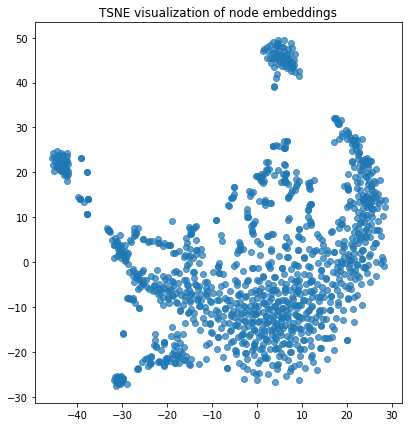

In [ ]:
# draw the embedding points, coloring them by the target label (paper subject)
alpha = 0.7

plt.figure(figsize=(7, 7))
plt.axes().set(aspect="equal")
plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    cmap="jet",
    alpha=alpha,
)
plt.title("{} visualization of node embeddings".format(transform.__name__))
plt.show()

In [ ]:
def add_edges_between_texts(G_texts, G_queries,a):


  #connect the 2 graphs.Experiment of running gnns to the connect graph of
  G = nx.compose(G_texts, G_queries)
  types = nx.get_node_attributes(G, "type")
  #It creates edges type of (text,text),(querie,text) and drops the (text,node) edges
  #for every word node
  for node in [n for n,v in G.nodes(data=True) if v['type'] == 0]:
    #take all the edges of this word node
    edges = G.edges(node)
    edges = list(edges.__iter__())
    new_nodes_ids = []
    #for every edge
    for edge in edges:
      #take only text nodes of this edge
      new_nodes_ids.append(edge[1])
    #for every pair of the texts nodes make a new edge with weight = avg of the
    for pair in itertools.product(new_nodes_ids, repeat=2):
      weight = np.mean([G[node][pair[0]]["weight"],G[node][pair[1]]["weight"]])
      #not connect qurie nodes together #for fighting the mean weight #weights.append(weight)
      if  types[pair[0]] + types[pair[1]] == 2 and weight > a:
        if G.has_edge(*pair):
            G[pair[0]][pair[1]]["weight"] = G[pair[0]][pair[1]]["weight"] + weight
        else :
            G.add_edge(pair[0],pair[1],weight=weight)
      elif  types[pair[0]] + types[pair[1]] == 3:
          if G.has_edge(*pair):
            G[pair[0]][pair[1]]["weight"] = G[pair[0]][pair[1]]["weight"] + weight
          else :
            G.add_edge(pair[0],pair[1],weight=weight)

    #remove the word node and all its edges
    G.remove_node(node)

  return G
#the parameter to create an edge between 2 texts
a =  10.0
g2 = add_edges_between_texts(G_texts, G_queries,a)

In [ ]:
G2 = StellarGraph.from_networkx(g2,node_features='futures')

In [ ]:
node_gen = Attri2VecNodeGenerator(G2, batch_size).flow([n for n,v in G_queries.nodes(data=True) if v['type'] == 2])
node_embeddings2 = embedding_model.predict(node_gen, workers=1, verbose=1)

2/2 [==============================] - 0s 13ms/step


In [ ]:
node_embeddings2.shape

(100, 128)

In [ ]:
transform = TSNE  # PCA
trans = transform(n_components=2)
emb_transformed = pd.DataFrame(trans.fit_transform(X3))

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
emb1 = emb_transformed[0:1209]
emb2 = emb_transformed[1209:]

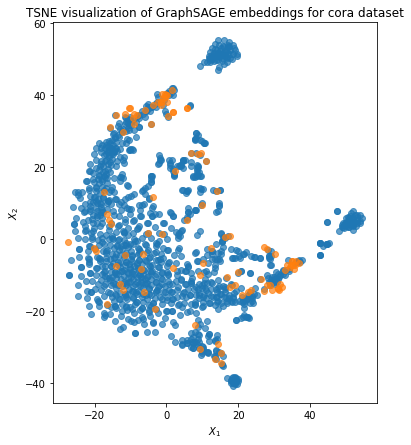

In [ ]:
alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(
    emb1[0],
    emb1[1],
    cmap="jet",
    alpha=alpha,
)
ax.scatter(
    emb2[0],
    emb2[1],
    cmap="jet",
    alpha=alpha,
)
ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "{} visualization of GraphSAGE embeddings for cora dataset".format(transform.__name__)
)
plt.show()

In [ ]:
X1 = node_embeddings
X2 = node_embeddings2
X3 = np.concatenate((X1, X2))

In [ ]:
embeddings_dict = {}
for embedding,node in zip(X3,g2.nodes()):
  embeddings_dict[node] = embedding
nx.set_node_attributes(g2,embeddings_dict, name="embeddings")

In [ ]:
def calc_precision_recall(doc_sims, relevant):
    cnt = 0
    retrieved = 1
    recall = []
    precision = []
    for doc in doc_sims:
        if doc in relevant:
            cnt += 1
            p = cnt / retrieved
            r = cnt / len(relevant)
            precision += [p]
            recall += [r]
        retrieved += 1

    avg_pre = sum(precision)/len(precision)
    avg_rec = sum(recall)/len(recall)

    #f1 = 2*((avg_pre*avg_rec)/(avg_pre+avg_rec))
    return avg_pre, avg_rec

In [ ]:
ALLrelevant = [['139', '151', '166', '311', '370', '392', '439', '440', '441', '454', '461', '502', '503', '505', '520', '522', '526', '527', '533', '593', '619', '737', '742', '789', '827', '835', '861', '875', '891', '921', '922', '1175', '1185', '1222'], ['169', '434', '454', '498', '499', '592', '875'], ['23', '40', '139', '190', '221', '246', '309', '311', '325', '345', '347', '356', '370', '374', '375', '439', '440', '454', '515', '520', '524', '526', '527', '533', '535', '560', '561', '571', '584', '604', '623', '633', '733', '742', '854', '856', '950', '967', '1144', '1161', '1172', '1175', '1196'], ['503', '538', '539', '540', '553', '604', '669', '711', '876'], ['23', '47', '50', '60', '114', '132', '135', '139', '151', '169', '189', '190', '197', '200', '226', '256', '265', '297', '298', '299', '311', '312', '325', '333', '343', '347', '349', '369', '370', '371', '374', '386', '392', '410', '420', '427', '428', '430', '434', '437', '439', '440', '441', '450', '461', '465', '478', '496', '497', '498', '499', '500', '501', '502', '503', '505', '511', '513', '516', '520', '524', '531', '533', '549', '553', '559', '561', '568', '590', '592', '593', '604', '605', '633', '669', '701', '702', '710', '711', '722', '724', '729', '731', '733', '750', '761', '763', '772', '779', '788', '805', '843', '845', '856', '857', '861', '864', '867', '875', '876', '888', '889', '895', '925', '935', '943', '944', '975', '980', '982', '990', '1000', '1019', '1038', '1040', '1064', '1076', '1080', '1088', '1091', '1092', '1093', '1098', '1144', '1156', '1175', '1185', '1188', '1196', '1223', '1226'], ['25', '31', '90', '195', '326', '370', '438', '440', '441', '503', '511', '586', '592', '593', '722', '731', '734', '805', '875', '922', '963', '975', '1092', '1093'], ['45', '53', '166', '171', '256', '370', '371', '386', '410', '439', '535', '623', '633', '634', '640', '669', '831', '853', '856', '857', '921', '1027', '1054', '1056', '1057', '1059', '1064', '1161'], ['23', '169', '322', '370', '386', '435', '439', '463', '496', '497', '498', '499', '503', '605', '683', '710', '750', '771', '867', '875', '944', '1125'], ['165', '174', '362', '370', '414', '443', '794', '992', '1040', '1115'], ['30', '126', '157', '170', '296', '301', '322', '370', '413', '443', '581', '676', '715', '722', '728', '758', '782', '835', '878', '941', '1115', '1215', '1218', '1234', '1239'], ['36', '46', '96', '186', '301', '428', '518', '649', '652', '659', '772', '796', '798', '799', '835', '837', '908', '909', '991', '1119', '1178', '1226'], ['70', '181', '443', '466', '755', '918', '1115'], ['156', '301', '314', '322', '370', '443', '462', '522', '643', '695', '715', '719', '722', '763', '764', '791', '822', '900', '902', '978', '1017', '1033', '1097', '1124'], ['5', '89', '92', '131', '135', '150', '156', '203', '232', '233', '234', '291', '297', '314', '319', '344', '345', '356', '367', '370', '379', '405', '413', '417', '419', '421', '424', '462', '465', '492', '584', '602', '616', '635', '662', '695', '719', '777', '791', '809', '815', '852', '889', '899', '930', '941', '1000', '1008', '1013', '1100', '1117', '1124', '1135', '1206', '1234'], ['17', '59', '63', '72', '91', '95', '97', '98', '99', '135', '149', '174', '197', '204', '205', '226', '232', '238', '266', '297', '301', '322', '339', '350', '354', '355', '364', '370', '385', '398', '408', '410', '413', '414', '420', '422', '423', '424', '426', '434', '443', '474', '545', '549', '550', '601', '603', '611', '642', '643', '657', '673', '690', '700', '720', '722', '724', '725', '729', '731', '735', '747', '752', '763', '764', '767', '792', '794', '816', '822', '833', '837', '844', '853', '854', '857', '863', '870', '875', '888', '889', '900', '944', '990', '993', '994', '1000', '1013', '1016', '1027', '1033', '1040', '1093', '1098', '1115', '1162', '1184', '1187', '1192', '1195', '1226', '1232', '1234', '1235'], ['5', '10', '17', '36', '41', '46', '69', '72', '89', '92', '95', '97', '98', '126', '129', '130', '132', '134', '135', '148', '150', '168', '181', '182', '186', '189', '197', '202', '205', '212', '225', '226', '238', '240', '255', '288', '290', '292', '297', '298', '301', '314', '320', '322', '330', '331', '333', '350', '357', '359', '364', '370', '376', '386', '396', '398', '413', '421', '424', '428', '434', '443', '462', '466', '468', '472', '473', '475', '478', '489', '490', '510', '512', '518', '522', '550', '553', '559', '581', '582', '586', '594', '615', '616', '641', '642', '643', '649', '656', '657', '658', '659', '660', '662', '673', '676', '708', '709', '711', '715', '719', '722', '723', '724', '725', '727', '729', '730', '731', '735', '755', '756', '758', '762', '763', '764', '767', '770', '772', '783', '791', '797', '799', '809', '810', '816', '822', '834', '835', '837', '844', '867', '870', '872', '875', '882', '888', '889', '893', '896', '901', '902', '919', '928', '932', '935', '937', '938', '941', '943', '944', '970', '974', '984', '990', '991', '993', '994', '1000', '1002', '1016', '1017', '1023', '1033', '1037', '1051', '1066', '1076', '1080', '1098', '1101', '1115', '1135', '1154', '1158', '1189', '1192', '1226', '1232', '1234'], ['49', '89', '101', '128', '132', '135', '153', '189', '233', '238', '297', '298', '301', '330', '333', '357', '359', '370', '428', '443', '450', '506', '643', '660', '662', '688', '722', '729', '730', '731', '735', '791', '810', '816', '837', '839', '845', '882', '889', '897', '937', '938', '941', '944', '1000', '1023', '1040', '1069', '1080', '1088', '1101', '1103', '1115', '1187', '1234'], ['129', '153', '205', '226', '364', '370', '414', '424', '443', '642', '656', '657', '658', '660', '725', '816', '935', '993', '994', '1016', '1162'], ['21', '49', '359', '370', '398', '432', '455', '487', '506', '618', '626', '672', '688', '693', '897', '936', '944', '1000', '1049', '1103', '1129', '1205'], ['126', '133', '153', '181', '207', '208', '220', '278', '283', '286', '287', '288', '290', '292', '370', '443', '538', '539', '540', '544', '604', '643', '711', '715', '731', '758', '767', '791', '823', '824', '882', '919', '924', '928', '944', '962', '970', '1066', '1080', '1115', '1168', '1189', '1213', '1215', '1234', '1239'], ['68', '97', '98', '181', '251', '413', '416', '434', '443', '551', '615', '676', '708', '709', '719', '722', '751', '756', '757', '932', '941', '1098', '1115', '1158', '1189'], ['13', '39', '67', '69', '104', '130', '189', '197', '221', '226', '237', '247', '258', '262', '276', '322', '325', '333', '342', '343', '350', '365', '370', '392', '431', '464', '465', '473', '478', '503', '510', '512', '514', '586', '590', '654', '671', '682', '692', '704', '713', '729', '731', '735', '764', '774', '788', '843', '845', '871', '880', '881', '882', '888', '898', '908', '942', '946', '968', '1000', '1033', '1040', '1083', '1093', '1114', '1144', '1156', '1166', '1194', '1195'], ['9', '10', '11', '12', '34', '42', '99', '162', '163', '167', '198', '248', '285', '322', '350', '370', '426', '434', '464', '509', '541', '582', '583', '598', '716', '780', '859', '883', '888', '979', '984', '1096', '1114', '1156', '1163'], ['32', '72', '199', '207', '210', '240', '254', '331', '370', '377', '411', '477', '492', '522', '552', '559', '611', '647', '677', '724', '763', '858', '913', '915', '926', '934', '1000', '1031', '1109', '1195', '1232'], ['72', '74', '83', '84', '106', '112', '120', '141', '162', '172', '198', '221', '276', '370', '390', '392', '411', '415', '425', '431', '432', '464', '465', '503', '505', '530', '550', '559', '566', '568', '569', '622', '647', '855', '858', '875', '880', '881', '891', '913', '915', '926', '949', '977', '1027', '1031', '1083', '1156', '1194', '1195', '1210'], ['74', '104', '199', '221', '281', '285', '328', '333', '342', '343', '370', '392', '431', '434', '442', '465', '485', '488', '490', '610', '617', '665', '713', '774', '807', '855', '881', '942', '1061', '1144', '1166', '1194', '1195'], ['98', '179', '599', '756', '858', '905', '912', '913', '1000', '1083', '1096'], ['134', '135', '136', '215', '274', '300', '322', '331', '333', '343', '351', '352', '370', '392', '398', '465', '467', '477', '510', '550', '559', '586', '611', '665', '722', '724', '729', '735', '759', '763', '822', '832', '837', '875', '882', '913', '937', '942', '944', '969', '990', '1000', '1033', '1040', '1083', '1093', '1187', '1192', '1222', '1226', '1234'], ['15', '100', '215', '274', '300', '322', '333', '343', '350', '351', '352', '353', '370', '385', '392', '434', '442', '477', '510', '553', '687', '714', '722', '724', '729', '759', '763', '764', '788', '822', '832', '837', '875', '937', '942', '944', '1000', '1033', '1040', '1083', '1093', '1184', '1192', '1234'], ['117', '328', '332', '433', '492', '557', '586', '687', '775', '880', '881', '911', '942', '1001', '1084', '1224', '1234'], ['43', '69', '127', '128', '136', '145', '168', '189', '213', '226', '239', '272', '330', '331', '332', '359', '370', '389', '433', '448', '467', '512', '550', '551', '557', '586', '620', '628', '651', '701', '722', '724', '729', '735', '760', '762', '764', '839', '845', '882', '937', '938', '940', '942', '944', '999', '1000', '1020', '1022', '1036', '1040', '1084', '1093', '1187', '1224', '1232', '1233', '1234'], ['43', '127', '128', '181', '184', '189', '212', '226', '239', '315', '330', '331', '370', '389', '433', '467', '473', '489', '506', '586', '722', '735', '764', '882', '937', '999', '1040', '1093', '1220', '1234'], ['37', '65', '91', '94', '96', '210', '225', '297', '359', '370', '403', '404', '413', '465', '515', '612', '637', '638', '663', '719', '721', '731', '763', '764', '773', '793', '795', '797', '811', '818', '822', '825', '846', '882', '888', '889', '916', '920', '927', '978', '981', '995', '996', '1000', '1023', '1052', '1072', '1098', '1105', '1113', '1122', '1123', '1183', '1186', '1189', '1215', '1234'], ['37', '65', '76', '77', '94', '135', '225', '235', '236', '247', '261', '277', '297', '359', '403', '404', '465', '471', '552', '627', '637', '638', '721', '773', '795', '817', '818', '825', '846', '916', '933', '941', '944', '995', '1000', '1023', '1052', '1186', '1234'], ['32', '120', '210', '811', '825', '888', '913', '915', '920', '926', '948', '1105', '1109', '1119'], ['66', '325', '370', '403', '612', '721', '722', '724', '1052'], ['3', '4', '28', '33', '35', '38', '65', '71', '76', '116', '119', '120', '131', '148', '150', '158', '175', '203', '220', '225', '231', '233', '234', '238', '247', '280', '291', '294', '318', '319', '333', '334', '342', '345', '370', '378', '379', '380', '392', '403', '428', '433', '443', '465', '470', '476', '482', '483', '491', '492', '510', '512', '514', '596', '600', '627', '671', '697', '711', '712', '717', '721', '731', '774', '776', '815', '817', '818', '831', '835', '849', '866', '871', '877', '888', '930', '933', '941', '942', '944', '946', '991', '1008', '1011', '1014', '1028', '1080', '1126', '1128', '1130', '1131', '1133', '1135', '1174', '1176', '1178', '1182', '1234'], ['14', '76', '117', '142', '252', '360', '370', '390', '392', '444', '465', '503', '505', '510', '572', '573', '621', '622', '627', '634', '644', '646', '666', '702', '729', '776', '786', '856', '862', '866', '873', '881', '882', '888', '971', '990', '1001', '1024', '1027', '1029', '1059', '1066', '1068', '1072', '1075', '1130', '1136', '1140', '1146', '1148', '1160', '1230', '1234'], ['3', '67', '74', '76', '83', '84', '85', '102', '107', '108', '112', '135', '143', '216', '217', '218', '219', '221', '222', '225', '226', '230', '233', '235', '236', '244', '248', '249', '252', '254', '263', '276', '277', '289', '293', '297', '301', '304', '306', '307', '308', '338', '342', '343', '356', '360', '365', '366', '370', '392', '404', '407', '412', '420', '433', '453', '465', '470', '488', '490', '494', '503', '505', '508', '510', '529', '530', '532', '534', '535', '553', '560', '563', '564', '565', '566', '567', '568', '569', '570', '571', '572', '573', '576', '584', '586', '608', '610', '619', '621', '622', '627', '639', '645', '646', '647', '652', '654', '702', '716', '729', '738', '739', '740', '744', '746', '749', '776', '777', '786', '845', '849', '851', '862', '869', '873', '881', '882', '888', '889', '892', '902', '918', '942', '944', '949', '966', '971', '990', '1001', '1026', '1027', '1029', '1044', '1066', '1070', '1072', '1076', '1096', '1127', '1135', '1136', '1137', '1139', '1140', '1141', '1146', '1148', '1160', '1161', '1185', '1194', '1209', '1210', '1211', '1222', '1224', '1225', '1230', '1234', '1236', '1238'], ['2', '3', '4', '5', '9', '10', '17', '28', '32', '35', '76', '77', '95', '103', '105', '108', '109', '112', '115', '116', '119', '120', '132', '142', '144', '150', '151', '169', '173', '189', '198', '210', '225', '231', '233', '235', '236', '240', '248', '249', '252', '254', '261', '263', '277', '279', '289', '291', '293', '294', '297', '298', '304', '308', '333', '338', '344', '345', '351', '352', '370', '392', '404', '405', '407', '413', '417', '420', '434', '465', '478', '479', '508', '510', '515', '526', '529', '532', '535', '553', '560', '571', '572', '573', '576', '583', '613', '616', '619', '645', '646', '654', '673', '677', '731', '735', '763', '780', '785', '786', '815', '849', '851', '852', '869', '882', '888', '899', '931', '941', '942', '949', '954', '956', '959', '1000', '1008', '1024', '1027', '1029', '1052', '1080', '1100', '1105', '1109', '1117', '1124', '1126', '1127', '1128', '1130', '1131', '1132', '1133', '1135', '1137', '1139', '1141', '1146', '1148', '1160', '1161', '1192', '1193', '1230', '1234'], ['46', '296', '301', '322', '370', '392', '603', '941', '998', '1106', '1107', '1108', '1115', '1184', '1190'], ['5', '46', '57', '92', '135', '209', '245', '297', '301', '314', '317', '322', '337', '339', '370', '416', '434', '443', '489', '505', '509', '550', '585', '586', '601', '695', '719', '722', '724', '731', '763', '764', '770', '822', '837', '888', '931', '944', '1000', '1033', '1040', '1085', '1093', '1187', '1192', '1232', '1234'], ['3', '4', '28', '54', '65', '66', '91', '94', '119', '124', '125', '135', '137', '140', '147', '172', '173', '199', '221', '261', '294', '301', '302', '303', '307', '308', '311', '324', '334', '361', '370', '386', '392', '404', '418', '430', '440', '441', '461', '471', '484', '490', '493', '504', '505', '522', '526', '527', '560', '562', '563', '568', '570', '571', '575', '636', '655', '693', '694', '707', '714', '733', '737', '741', '758', '793', '795', '817', '818', '864', '889', '891', '913', '916', '918', '921', '944', '958', '960', '966', '967', '975', '982', '997', '1000', '1080', '1093', '1094', '1121', '1156', '1167', '1172', '1184', '1185', '1199', '1200', '1209', '1216'], ['44', '45', '53', '67', '72', '74', '83', '84', '106', '108', '118', '121', '122', '124', '125', '135', '138', '142', '143', '154', '166', '171', '172', '190', '235', '236', '242', '243', '244', '257', '264', '269', '276', '297', '310', '312', '325', '336', '360', '370', '371', '381', '386', '390', '392', '399', '409', '411', '415', '430', '435', '436', '453', '465', '493', '495', '503', '504', '523', '528', '538', '548', '561', '563', '566', '567', '568', '569', '570', '572', '574', '575', '576', '590', '608', '621', '622', '623', '624', '625', '634', '636', '645', '647', '655', '666', '691', '702', '737', '743', '747', '750', '765', '766', '767', '786', '840', '841', '847', '850', '856', '858', '862', '873', '875', '951', '953', '961', '967', '971', '973', '1024', '1029', '1030', '1053', '1054', '1055', '1057', '1059', '1070', '1072', '1130', '1136', '1139', '1142', '1144', '1146', '1148', '1156', '1157', '1160', '1185', '1196', '1201', '1202', '1210', '1212', '1222', '1230', '1231'], ['278', '283', '286', '287', '288', '289', '290', '292', '293', '338', '538', '540', '715', '758', '803', '919', '924', '1050', '1159', '1168'], ['51', '53', '370', '410', '430', '500', '503', '516', '553', '568', '623', '702', '737', '854', '856', '857', '1196', '1212'], ['15', '57', '92', '118', '121', '125', '163', '165', '172', '183', '208', '209', '245', '259', '278', '279', '283', '286', '287', '295', '296', '301', '302', '317', '337', '361', '370', '406', '416', '436', '505', '508', '525', '585', '613', '684', '694', '695', '707', '781', '862', '868', '906', '928', '931', '971', '998', '1000', '1013', '1058', '1075', '1106', '1107', '1108', '1129', '1132', '1165', '1192', '1194', '1206'], ['44', '72', '74', '124', '143', '154', '190', '257', '312', '336', '386', '422', '436', '453', '493', '495', '523', '548', '566', '568', '576', '691', '765', '766', '786', '850', '967', '1142', '1201', '1231'], ['72', '84', '138', '143', '230', '313', '370', '392', '393', '430', '436', '440', '465', '493', '503', '504', '505', '523', '530', '553', '562', '563', '566', '568', '570', '586', '608', '624', '625', '691', '726', '743', '749', '953', '972', '1198'], ['44', '259', '309', '347', '435', '440', '495', '505', '543', '548', '568', '570', '575', '601', '634', '829', '848', '953', '961', '973', '1058', '1156', '1157', '1159', '1160'], ['1', '11', '14', '18', '19', '26', '44', '51', '55', '62', '63', '66', '67', '72', '83', '84', '85', '102', '107', '108', '112', '114', '122', '124', '135', '137', '141', '142', '177', '190', '191', '196', '200', '201', '214', '216', '217', '218', '219', '221', '222', '225', '230', '235', '236', '245', '249', '252', '254', '263', '264', '270', '276', '277', '279', '281', '289', '297', '302', '303', '304', '305', '306', '307', '308', '311', '322', '325', '333', '337', '343', '345', '355', '360', '365', '366', '370', '382', '383', '386', '391', '392', '400', '402', '407', '415', '417', '418', '419', '430', '435', '437', '440', '442', '444', '445', '465', '481', '484', '488', '490', '493', '494', '495', '498', '501', '502', '503', '504', '505', '510', '511', '517', '521', '526', '528', '529', '530', '531', '532', '534', '535', '548', '553', '560', '562', '563', '564', '565', '566', '568', '569', '570', '571', '572', '573', '574', '575', '576', '589', '590', '605', '608', '625', '627', '636', '639', '643', '646', '675', '681', '685', '707', '726', '733', '737', '738', '739', '740', '741', '744', '745', '746', '747', '748', '749', '779', '789', '790', '793', '827', '828', '829', '847', '852', '856', '857', '858', '861', '864', '865', '866', '868', '869', '875', '881', '889', '891', '892', '905', '918', '921', '925', '926', '933', '936', '949', '950', '954', '956', '957', '958', '966', '990', '991', '1001', '1024', '1026', '1027', '1044', '1057', '1065', '1070', '1074', '1076', '1079', '1091', '1120', '1127', '1135', '1137', '1139', '1141', '1156', '1167', '1196', '1198', '1199', '1200', '1202', '1203', '1204', '1207', '1208', '1209', '1210', '1211', '1212', '1234', '1236', '1238'], ['406', '505'], ['1', '11', '55', '81', '160', '188', '223', '228', '347', '370', '401', '432', '447', '505', '509', '577', '590', '767', '917', '987', '1170', '1228', '1229'], ['11', '23', '55', '187', '206', '211', '223', '228', '229', '333', '341', '347', '358', '369', '382', '394', '401', '402', '432', '485', '488', '505', '513', '547', '550', '552', '577', '590', '607', '613', '626', '631', '632', '716', '767', '771', '790', '793', '806', '812', '819', '860', '904', '905', '917', '941', '964', '990', '1003', '1005', '1007', '1013', '1048', '1060', '1099', '1134', '1163', '1164', '1169', '1171', '1192', '1237'], ['70', '232', '305', '347', '358', '391', '430', '432', '463', '505', '521', '530', '640', '675', '749', '779', '820', '828', '847', '890', '1056', '1070', '1156', '1205'], ['55', '89', '123', '135', '181', '185', '212', '288', '290', '292', '414', '424', '432', '443', '450', '758', '767', '783', '794', '919', '924', '925', '928', '970', '972', '1066', '1091', '1093', '1102', '1115', '1234', '1239'], ['1', '6', '8', '11', '62', '79', '80', '81', '160', '177', '178', '188', '200', '223', '228', '282', '346', '369', '370', '394', '397', '415', '432', '447', '513', '577', '588', '590', '668', '778', '784', '790', '812', '833', '860', '865', '890', '905', '983', '986', '987', '988', '989', '1086', '1090', '1091', '1095', '1170', '1171', '1173', '1203'], ['1', '6', '7', '43', '48', '55', '60', '62', '63', '80', '81', '82', '102', '111', '160', '164', '178', '179', '187', '188', '200', '223', '228', '229', '271', '282', '335', '346', '347', '366', '369', '370', '384', '392', '394', '397', '402', '415', '427', '429', '432', '447', '457', '463', '485', '505', '511', '513', '517', '550', '577', '588', '589', '590', '591', '609', '614', '631', '668', '748', '749', '769', '778', '784', '790', '805', '812', '820', '860', '865', '874', '890', '903', '905', '912', '917', '964', '983', '986', '987', '988', '989', '990', '1005', '1025', '1077', '1086', '1090', '1091', '1134', '1170', '1171', '1173', '1228', '1234'], ['1', '6', '11', '18', '45', '48', '55', '62', '63', '67', '79', '80', '81', '84', '102', '107', '110', '111', '122', '160', '164', '166', '177', '179', '187', '188', '191', '200', '214', '223', '228', '229', '245', '275', '279', '281', '284', '306', '333', '335', '346', '347', '365', '366', '369', '370', '382', '386', '392', '394', '397', '401', '402', '415', '425', '427', '430', '432', '442', '444', '447', '452', '465', '485', '504', '505', '509', '513', '521', '524', '530', '565', '572', '574', '577', '588', '590', '591', '607', '608', '609', '614', '631', '668', '670', '678', '679', '685', '689', '738', '748', '767', '769', '778', '784', '790', '812', '820', '827', '828', '833', '860', '865', '869', '874', '882', '903', '905', '912', '917', '936', '937', '964', '977', '983', '986', '987', '988', '989', '990', '1005', '1007', '1025', '1044', '1056', '1060', '1071', '1074', '1075', '1077', '1091', '1095', '1097', '1102', '1134', '1143', '1163', '1170', '1171', '1172', '1173', '1203', '1205', '1228', '1232'], ['17', '87', '100', '155', '241', '267', '322', '340', '348', '354', '370', '446', '519', '550', '587', '597', '653', '698', '722', '724', '751', '764', '990', '1000', '1004', '1040', '1041', '1043', '1046', '1047', '1104', '1110', '1192', '1194'], ['10', '56', '62', '63', '114', '132', '187', '195', '196', '197', '200', '226', '298', '347', '358', '370', '383', '427', '432', '434', '437', '439', '465', '481', '490', '498', '500', '501', '502', '505', '511', '517', '531', '532', '535', '565', '570', '590', '605', '668', '685', '726', '735', '738', '739', '741', '754', '763', '767', '827', '847', '864', '865', '875', '882', '912', '944', '969', '980', '990', '1040', '1079', '1092', '1093', '1098', '1188', '1207', '1208', '1234', '1236'], ['10', '17', '24', '43', '56', '60', '62', '63', '64', '69', '72', '88', '94', '110', '144', '148', '155', '160', '182', '192', '193', '194', '197', '200', '211', '224', '226', '237', '238', '244', '267', '297', '321', '322', '330', '331', '333', '340', '348', '349', '354', '358', '359', '370', '372', '382', '383', '427', '429', '434', '437', '438', '446', '458', '459', '460', '465', '472', '473', '479', '486', '505', '537', '539', '550', '551', '558', '559', '580', '586', '590', '607', '643', '663', '677', '698', '703', '704', '722', '724', '729', '731', '734', '735', '736', '761', '763', '764', '767', '768', '783', '787', '803', '804', '806', '819', '821', '822', '837', '842', '843', '844', '845', '870', '879', '880', '882', '885', '886', '888', '889', '904', '907', '912', '913', '914', '920', '937', '941', '944', '945', '964', '969', '990', '1000', '1022', '1023', '1032', '1033', '1038', '1039', '1040', '1042', '1071', '1073', '1080', '1093', '1104', '1151', '1192', '1195', '1214', '1232', '1234'], ['1', '23', '62', '63', '166', '322', '347', '370', '374', '429', '434', '437', '438', '463', '490', '499', '500', '501', '502', '505', '592', '669', '698', '704', '724', '763', '803', '805', '821', '922', '976', '980', '1040', '1091', '1155', '1171', '1192', '1228', '1229'], ['17', '20', '22', '24', '64', '144', '148', '155', '160', '197', '227', '267', '322', '331', '349', '358', '370', '372', '382', '434', '437', '472', '550', '590', '605', '606', '674', '698', '703', '722', '724', '768', '814', '842', '844', '882', '889', '907', '944', '963', '1000', '1033', '1038', '1067', '1071', '1076', '1091', '1093', '1188', '1195'], ['17', '20', '22', '24', '64', '87', '93', '132', '135', '144', '148', '155', '192', '194', '197', '206', '211', '224', '227', '238', '267', '297', '322', '323', '331', '341', '349', '358', '368', '370', '372', '383', '386', '387', '388', '437', '519', '539', '543', '546', '550', '578', '587', '597', '599', '606', '611', '629', '653', '674', '699', '722', '736', '763', '788', '803', '814', '819', '821', '833', '842', '882', '885', '886', '889', '904', '913', '963', '964', '990', '1000', '1006', '1007', '1038', '1042', '1045', '1046', '1048', '1067', '1073', '1092', '1093', '1099', '1149', '1150', '1151', '1153', '1164', '1188', '1195', '1214', '1232', '1234', '1237'], ['1', '10', '11', '13', '17', '22', '63', '100', '148', '155', '160', '166', '187', '200', '267', '322', '340', '348', '350', '370', '385', '427', '429', '434', '446', '463', '498', '558', '590', '605', '607', '630', '698', '722', '724', '731', '736', '763', '767', '771', '788', '821', '837', '882', '907', '912', '913', '944', '969', '976', '980', '990', '1004', '1098', '1104', '1109', '1134', '1155', '1192', '1194', '1195', '1214', '1226'], ['43', '61', '148', '354', '370', '472', '473', '519', '724', '764', '842', '910', '914', '1234'], ['11', '64', '90', '135', '195', '206', '297', '327', '331', '341', '349', '358', '359', '370', '437', '438', '543', '546', '550', '607', '632', '734', '819', '826', '838', '882', '889', '904', '913', '944', '964', '969', '1000', '1003', '1040', '1046', '1048', '1093', '1099', '1134', '1149', '1150', '1164', '1172', '1234'], ['193', '326', '327', '359', '363', '370', '438', '550', '703', '724', '837', '907', '944', '1000', '1234'], ['17', '327', '340', '370', '438', '698', '722', '804', '837', '944', '952', '1000', '1009', '1032', '1104', '1232', '1234'], ['11', '56', '148', '327', '370', '547'], ['58', '250', '323', '333', '682', '683', '732', '733', '837', '941', '1000', '1019', '1125'], ['50', '224', '227', '359', '370', '438', '629', '630', '724', '806', '843', '844', '990', '1000', '1093', '1228', '1229', '1234'], ['148', '370', '724', '910', '914', '1000', '1093'], ['100', '241', '273', '316', '348', '354', '359', '370', '446', '519', '587', '597', '751', '757', '837', '944', '1043', '1047', '1110', '1234', '1235'], ['329', '330', '359', '370', '437', '438', '606', '731', '882', '889', '1007', '1023', '1039', '1048', '1080', '1134', '1188'], ['25', '27', '31', '50', '90', '128', '135', '148', '168', '195', '197', '224', '226', '227', '267', '297', '298', '321', '323', '326', '327', '329', '330', '333', '359', '370', '428', '437', '438', '542', '546', '550', '551', '558', '586', '592', '629', '630', '663', '722', '724', '729', '731', '734', '735', '754', '806', '826', '837', '839', '843', '844', '845', '879', '882', '889', '912', '937', '939', '941', '944', '963', '990', '1006', '1012', '1023', '1034', '1035', '1040', '1080', '1092', '1093', '1134', '1138', '1149', '1150', '1152', '1153', '1188', '1220', '1232', '1234'], ['61', '65', '82', '90', '93', '135', '146', '152', '159', '161', '179', '184', '188', '238', '253', '255', '265', '282', '315', '320', '321', '326', '330', '333', '359', '370', '373', '427', '438', '451', '452', '459', '460', '479', '556', '648', '663', '680', '686', '696', '718', '722', '724', '731', '734', '753', '800', '802', '838', '884', '889', '912', '944', '945', '1010', '1015', '1019', '1021', '1042', '1065', '1069', '1071', '1078', '1081', '1086', '1089', '1090', '1091', '1093', '1111', '1112', '1118', '1179', '1180', '1181', '1227', '1234'], ['65', '75', '123', '132', '135', '146', '148', '179', '184', '255', '315', '320', '330', '333', '359', '370', '373', '384', '427', '438', '452', '648', '650', '663', '826', '829', '838', '882', '912', '923', '944', '945', '1000', '1010', '1023', '1065', '1082', '1089', '1091', '1112', '1179', '1181', '1234'], ['61', '135', '152', '159', '238', '330', '333', '427', '438', '451', '452', '453', '458', '459', '460', '612', '663', '696', '722', '753', '800', '884', '912', '945', '1010', '1042', '1065', '1071', '1078', '1091', '1179', '1180', '1227', '1234'], ['31', '90', '93', '132', '135', '195', '253', '321', '326', '359', '370', '438', '542', '546', '550', '551', '586', '592', '729', '731', '734', '941', '944', '990', '1092', '1134', '1232', '1234'], ['25', '31', '90', '93', '132', '135', '148', '152', '159', '189', '195', '197', '238', '253', '297', '321', '326', '327', '330', '331', '333', '359', '370', '427', '438', '458', '542', '543', '546', '550', '551', '586', '592', '722', '724', '729', '731', '734', '826', '837', '845', '879', '882', '889', '904', '912', '937', '941', '944', '952', '963', '990', '1000', '1003', '1040', '1078', '1092', '1150', '1188', '1227', '1232', '1234'], ['18', '166', '187', '238', '366', '370', '394', '427', '430', '432', '447', '463', '501', '505', '517', '550', '590', '609', '668', '767', '905', '912', '988', '989', '1074', '1077', '1091', '1102', '1143', '1170', '1171', '1203'], ['8', '160', '333', '346', '384', '555', '590', '778', '837', '912', '922', '952', '986', '1086', '1112', '1179'], ['29', '58', '88', '98', '179', '200', '202', '250', '370', '427', '432', '438', '469', '475', '589', '590', '724', '732', '733', '888', '912', '941', '969', '982', '983', '1018', '1019', '1022', '1036', '1065', '1118'], ['8', '61', '85', '110', '135', '148', '152', '160', '200', '238', '271', '330', '346', '370', '384', '427', '505', '554', '555', '577', '586', '590', '722', '731', '763', '769', '922', '944', '945', '952', '983', '990', '1000', '1015', '1033', '1071', '1077', '1086', '1090', '1091', '1112', '1118', '1173', '1181', '1227', '1232', '1234'], ['187', '223', '228', '229', '333', '369', '370', '382', '394', '401', '432', '438', '485', '513', '550', '590', '631', '632', '668', '722', '812', '819', '833', '860', '945', '990', '1005', '1007', '1015', '1025', '1032', '1060', '1071', '1134', '1163', '1169', '1180', '1234'], ['370', '443', '457', '590', '614', '668', '678', '679', '702', '945', '990', '1091', '1134', '1144'], ['79', '152', '176', '177', '179', '260', '265', '370', '469', '479', '590', '706', '778', '905', '912', '1065', '1086'], ['7', '160', '161', '176', '177', '200', '260', '265', '370', '451', '479', '505', '589', '590', '763', '778', '874', '884', '912', '987', '1065', '1071', '1086', '1089', '1090', '1091', '1234', '1238'], ['1', '3', '4', '8', '9', '11', '13', '15', '17', '21', '29', '30', '32', '33', '40', '41', '45', '46', '50', '56', '57', '58', '59', '60', '69', '78', '88', '92', '94', '95', '97', '98', '100', '103', '105', '109', '115', '116', '118', '119', '121', '122', '124', '128', '134', '135', '139', '147', '163', '166', '170', '173', '174', '181', '182', '183', '186', '189', '199', '202', '204', '211', '226', '237', '240', '241', '242', '243', '244', '248', '250', '256', '259', '261', '263', '264', '265', '266', '267', '268', '272', '274', '275', '276', '278', '279', '281', '283', '286', '287', '294', '297', '300', '301', '314', '317', '322', '331', '333', '339', '348', '351', '352', '353', '354', '355', '359', '361', '362', '364', '370', '376', '381', '385', '392', '395', '396', '398', '405', '412', '413', '416', '422', '423', '426', '428', '431', '434', '443', '454', '455', '466', '468', '473', '474', '475', '478', '485', '486', '489', '508', '512', '538', '545', '549', '550', '551', '552', '553', '559', '562', '579', '582', '586', '594', '598', '601', '603', '611', '615', '626', '641', '642', '643', '648', '659', '667', '673', '682', '683', '684', '688', '690', '694', '695', '700', '704', '714', '719', '720', '722', '724', '725', '727', '728', '729', '731', '732', '733', '735', '751', '752', '756', '759', '762', '763', '764', '767', '768', '770', '771', '772', '773', '779', '781', '782', '784', '787', '788', '791', '794', '796', '797', '798', '799', '801', '803', '808', '809', '822', '833', '834', '835', '836', '838', '844', '854', '859', '866', '867', '868', '870', '872', '875', '880', '882', '883', '888', '893', '894', '896', '897', '900', '906', '913', '914', '935', '941', '944', '947', '965', '974', '982', '985', '990', '992', '993', '997', '998', '1000', '1018', '1019', '1023', '1033', '1040', '1041', '1043', '1047', '1051', '1054', '1056', '1057', '1058', '1063', '1080', '1085', '1091', '1093', '1095', '1097', '1098', '1103', '1106', '1107', '1108', '1115', '1116', '1118', '1119', '1125', '1134', '1177', '1184', '1186', '1189', '1191', '1192', '1216', '1217', '1219', '1226', '1232', '1234', '1235'], ['17', '43', '111', '130', '135', '136', '148', '181', '185', '189', '193', '200', '213', '226', '238', '258', '333', '342', '354', '370', '377', '392', '429', '434', '446', '465', '472', '473', '479', '489', '492', '503', '510', '514', '550', '559', '586', '596', '599', '607', '611', '643', '653', '661', '671', '687', '692', '705', '722', '724', '729', '731', '735', '763', '764', '767', '778', '783', '788', '804', '806', '822', '824', '826', '837', '838', '839', '842', '845', '856', '858', '859', '879', '883', '888', '889', '908', '910', '914', '915', '926', '930', '934', '940', '941', '944', '946', '952', '990', '1000', '1014', '1023', '1031', '1033', '1040', '1066', '1071', '1093', '1147', '1151', '1186', '1188', '1192', '1195', '1226', '1227', '1232', '1234'], ['113', '145', '180', '272', '422', '467', '489', '550', '586', '722', '724', '873', '999', '1000', '1020', '1023', '1033', '1233'], ['78', '114', '122', '123', '137', '192', '209', '270', '277', '282', '309', '311', '322', '359', '370', '400', '435', '436', '440', '442', '494', '498', '504', '505', '533', '536', '571', '742', '745', '789', '955', '1016', '1091', '1092', '1121', '1143', '1156', '1158', '1197', '1199', '1200', '1204', '1223'], ['12', '30', '43', '192', '257', '322', '603', '606', '1097'], ['9', '40', '43', '75', '454', '455', '520', '526', '527', '673', '883', '1087'], ['52', '68', '135', '140', '190', '392', '416', '538', '539', '751', '757'], ['145', '180', '270', '272', '362', '467', '595', '667', '728', '782', '787', '985', '1018', '1019', '1118'], ['268', '324', '449', '992', '1191'], ['59', '183', '370', '579', '803', '833', '1000', '1017', '1033', '1097', '1232']]

In [ ]:
from numpy.linalg import norm

embs = nx.get_node_attributes(g2, "embeddings")
querie_vecs = {k-1500:v for (k,v) in embs.items() if k >= 1500}
embs = {k:v for (k,v) in embs.items() if k < 1500}
print(len(querie_vecs))
attr = nx.get_node_attributes(g2, "futures")
df_results = pd.DataFrame(columns=['avg_pre','avg_rec'])
i = 0

for q in querie_vecs:

    df = pd.DataFrame(columns=['index','similarity_embeddings'])
    for key1,key2 in zip(embs,attr):
      A =  np.array(querie_vecs[q])
      B =  np.array(embs[key1])
      C =  np.array(attr[key2])
      cosine1 = np.dot(A,B)/(norm(A)*norm(B))
      df = df.append({'index': key1,'similarity_embeddings' : cosine1}, ignore_index=True)

    relevant = ALLrelevant[i]
    df2 = df.sort_values(by=['similarity_embeddings'], ascending=False)
    indexes = [str(int(j)) for j in df2['index'].values]

    avg_pre, avg_rec = calc_precision_recall(indexes,relevant)
    print(avg_pre, avg_rec)
    df_results = df_results.append({'avg_pre': avg_pre,'avg_rec' : avg_rec}, ignore_index=True)
    i = i +1